In [14]:

import os
import pandas as pd



from sklearn.preprocessing import MinMaxScaler, StandardScaler



##Data Augmentation
- Dia das mães
- Nome da loja
- Feriado

##Algoritmos
- ANN
- X6Boost
- TSAI
- SARIMA



In [18]:
#test_file = '/content/drive/MyDrive/PUC/Ciência de Dados e Inteligência Artificial/2022-02/98H05-04 - Aprendizado Supervisionado/TF/data/renner_sales_sample_test.csv'
#train_file = '/content/drive/MyDrive/PUC/Ciência de Dados e Inteligência Artificial/2022-02/98H05-04 - Aprendizado Supervisionado/TF/data/renner_sales_sample_train.csv'

test_file = '../TF/data/renner_sales_sample_test.csv'
train_file = '../TF/data/renner_sales_sample_train.csv'

test = pd.read_csv(test_file)
train = pd.read_csv(train_file)

In [19]:
test.head()

,item,loja,tipo_loja,ds,venda
0,10223,renner_ar_ex_1,física,2022-05-08T00:00:00.000Z,2
1,10223,renner_ar_ex_1,física,2022-05-15T00:00:00.000Z,2
2,10223,renner_ar_ex_1,física,2022-05-01T00:00:00.000Z,12
3,10223,renner_ar_ex_1,física,2022-05-22T00:00:00.000Z,8
4,10223,renner_ar_ex_1,física,2022-05-29T00:00:00.000Z,7


<AxesSubplot:xlabel='ds'>

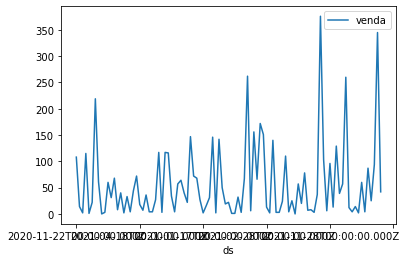

In [20]:
data = train.copy(deep=True)
data.set_index('ds', inplace=True)
data[(data['tipo_loja'] == 'física') & (data['loja'] == 'renner_ar_ex_1')][['venda']].plot()

In [ ]:
train.groupby(by='loja').sum()

,item,venda
loja,,
renner_ar_ex_1,991631,5540
renner_ar_ex_2,1001854,6081
renner_ar_ex_3,1001854,4640
renner_ar_ex_4,991631,4868
renner_br_ac_1,2647757,41685
...,...,...
renner_uy_ex_5,1666349,13664
renner_uy_ex_6,1339213,16878
renner_uy_ex_7,1226760,8440


In [44]:
train.pivot(index='ds', columns='loja', values='venda').fillna(0)

loja,renner_ar_ex_1,renner_ar_ex_2,renner_ar_ex_3,renner_ar_ex_4,renner_br_ac_1,renner_br_al_21,renner_br_al_25,renner_br_al_34,renner_br_al_60,renner_br_am_1,...,renner_br_to_11,renner_uy_ex_1,renner_uy_ex_2,renner_uy_ex_3,renner_uy_ex_4,renner_uy_ex_5,renner_uy_ex_6,renner_uy_ex_7,renner_uy_ex_8,renner_uy_ex_9
ds,,,,,,,,,,,,,,,,,,,,,
2017-01-01T00:00:00.000Z,0.0,0.0,0.0,0.0,193.0,280.0,222.0,88.0,460.0,312.0,...,154.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-08T00:00:00.000Z,0.0,0.0,0.0,0.0,158.0,202.0,184.0,114.0,333.0,207.0,...,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-15T00:00:00.000Z,0.0,0.0,0.0,0.0,106.0,218.0,148.0,104.0,307.0,206.0,...,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-22T00:00:00.000Z,0.0,0.0,0.0,0.0,94.0,138.0,92.0,80.0,241.0,278.0,...,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-29T00:00:00.000Z,0.0,0.0,0.0,0.0,121.0,147.0,92.0,86.0,228.0,424.0,...,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-06T00:00:00.000Z,16.0,24.0,16.0,21.0,160.0,186.0,164.0,126.0,315.0,160.0,...,176.0,28.0,31.0,22.0,0.0,9.0,9.0,4.0,24.0,18.0
2022-03-13T00:00:00.000Z,14.0,27.0,7.0,22.0,178.0,180.0,195.0,133.0,265.0,184.0,...,176.0,21.0,24.0,19.0,0.0,9.0,14.0,2.0,14.0,12.0
2022-03-20T00:00:00.000Z,8.0,7.0,3.0,3.0,145.0,134.0,139.0,140.0,249.0,151.0,...,109.0,16.0,9.0,6.0,0.0,7.0,4.0,0.0,6.0,13.0


In [ ]:
class TSData:
    def __init__(self, column, data):
        self.name = column
        self.data = data[column]
        #self.data_scaled = pd.DataFrame(self.data_scaled, columns=self.data.columns, index=self.data.index)
        self.data[column + '_scaled'] = MinMaxScaler().fit_transform(self.data)
        self.features


In [36]:
def create_features(df, column):
    features = pd.DataFrame()
    features['date'] = df.index
    features['MA_3'] = df[column].rolling(3).mean()
    features['MA_7'] = df[column].rolling(7).mean()
    features['MA_14'] = df[column].rolling(14).mean()
    features['MA_21'] = df[column].rolling(21).mean()

    features['STD_3'] = df[column].rolling(3).std()
    features['STD_7'] = df[column].rolling(7).std()
    features['STD_14'] = df[column].rolling(14).std()
    features['STD_21'] = df[column].rolling(21).std()


    return features


In [46]:
def split_data(df):
  web = df[df['tipo_loja'] == 'web']
  fisica = df[df['tipo_loja'] == 'física']

  return fisica, web

def adjust_data(df, column):
  scaler = MinMaxScaler()
  data = scaler.fit_transform(test[column].values.reshape(-1,1))
  df['venda'] = data.reshape(1, -1)

  return df


In [33]:


temp = test.pivot(index='ds', columns='loja', values='venda').fillna(0)
temp


column = 'renner_br_ac_1'
temp[[column]]

loja,renner_br_ac_1
ds,
2022-04-10T00:00:00.000Z,146.0
2022-04-17T00:00:00.000Z,100.0
2022-04-24T00:00:00.000Z,109.0
2022-05-01T00:00:00.000Z,157.0
2022-05-08T00:00:00.000Z,136.0
2022-05-15T00:00:00.000Z,92.0
2022-05-22T00:00:00.000Z,104.0
2022-05-29T00:00:00.000Z,120.0


In [ ]:
test['venda'].values.reshape(-1,1).reshape(1,-1)

array([[ 2,  2, 12, ...,  6,  0,  4]])

In [37]:
create_features(temp, column)

,date,MA_3,MA_7,MA_14,MA_21,STD_3,STD_7,STD_14,STD_21
0,2022-04-10T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-04-17T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-04-24T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-05-01T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-05-08T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022-05-15T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-05-22T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2022-05-29T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
